<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [151]:
df = pd.read_csv("/content/train.csv.xls")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [153]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [154]:
df.nunique()

,0
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [156]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [157]:
numerical_cols = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

target_col = "price_range"

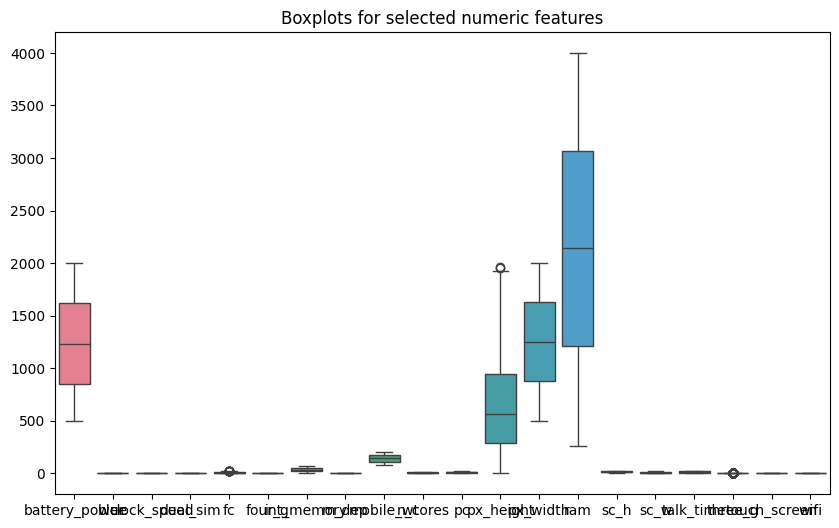

In [158]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplots for selected numeric features")
plt.show()

In [160]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


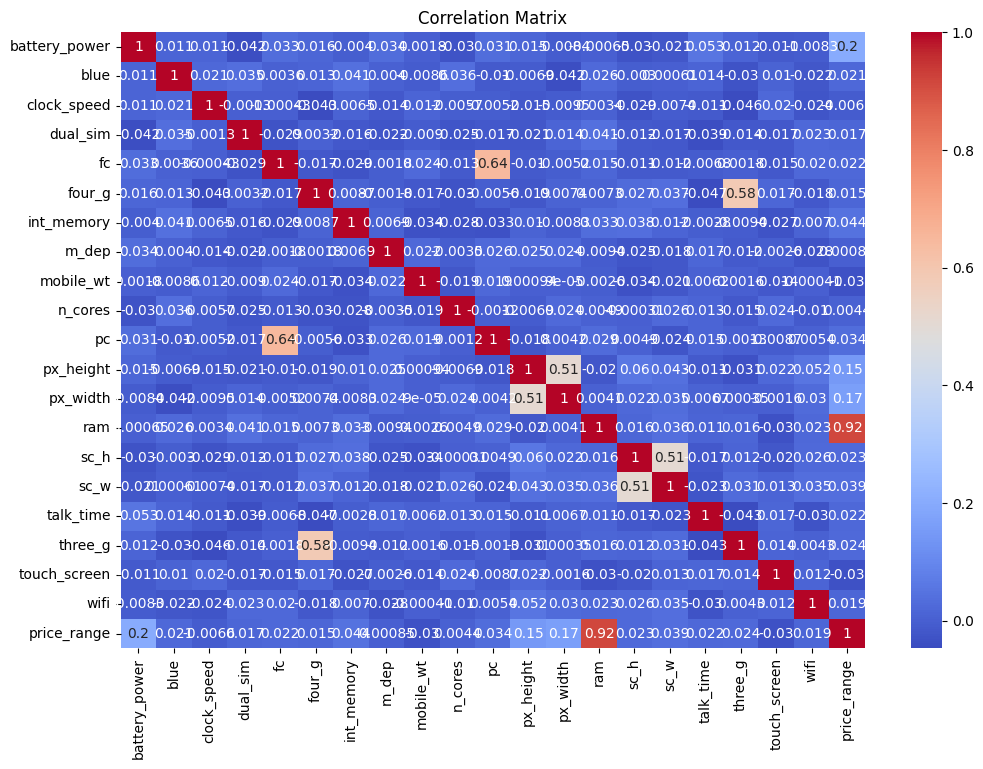

In [161]:
corr_matrix = df[numerical_cols + [target_col]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [162]:
X = df.drop(target_col, axis=1)
y = df[target_col]

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
from sklearn.tree import DecisionTreeClassifier
stump = DecisionTreeClassifier(max_depth=1,random_state=42)
stump.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [177]:
y_pred = stump.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.524


In [191]:
base_learner = DecisionTreeClassifier(max_depth=1, random_state=42)

ada = AdaBoostClassifier(
    estimator = base_learner,
    n_estimators=20,
    learning_rate=0.3,
    random_state=42
)

ada.fit(X_train_scaled, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.3, n_estimators=20, random_state=42)

In [192]:
y_pred_ada = ada.predict(X_test_scaled)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print('AdaBoost Accuracy: ', accuracy_score(y_test, y_pred_ada))

AdaBoost Accuracy:  0.74


In [193]:
print(classification_report(y_test, y_pred_ada))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       132
           1       0.66      0.72      0.69       118
           2       0.66      0.50      0.57       120
           3       0.75      0.88      0.81       130

    accuracy                           0.74       500
   macro avg       0.73      0.73      0.73       500
weighted avg       0.74      0.74      0.73       500

Confusion Matrix:
 [[111  21   0   0]
 [ 18  85  15   0]
 [  1  22  60  37]
 [  0   0  16 114]]


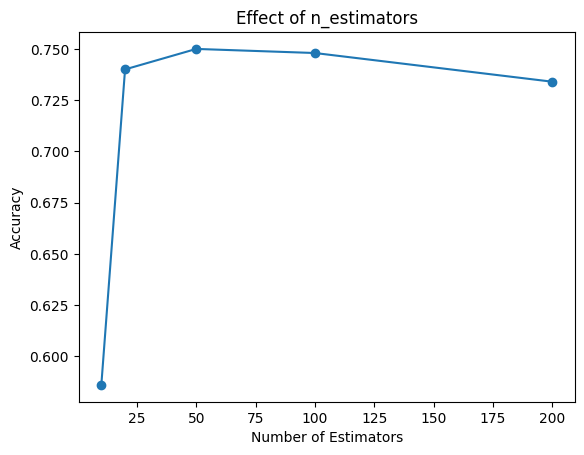

In [195]:
estimators = [10,20,50,100,200]
accs = []
for n in estimators:
  model = AdaBoostClassifier(
      estimator = base_learner,
      n_estimators = n,
      learning_rate = 0.3,
      random_state = 42
  )
  model.fit(X_train_scaled,y_train)
  accs.append(accuracy_score(y_test,model.predict(X_test_scaled)))


plt.plot(estimators, accs, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators')
plt.show()

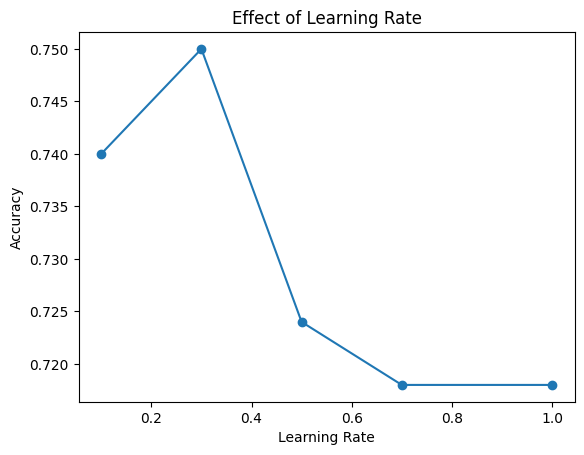

In [196]:
rates = [0.1, 0.3, 0.5, 0.7, 1.0]
accs_lr = []

for lr in rates:
  model = AdaBoostClassifier(
      estimator = base_learner,
      n_estimators = 50,
      learning_rate = lr,
      random_state = 42
  )
  model.fit(X_train_scaled,y_train)
  accs_lr.append(accuracy_score(y_test,model.predict(X_test_scaled)))


plt.plot(rates, accs_lr, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate')
plt.show()

In [205]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for AdaBoost
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
    'estimator__max_depth': [1, 2]
}

# GridSearchCV setup
grid = GridSearchCV(
    estimator=AdaBoostClassifier(
        estimator=base_learner,
        random_state=42
    ),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Run grid search
grid.fit(X_train_scaled, y_train)

# Best model evaluation
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(X_test_scaled)

print("Best Parameters Found:")
print(grid.best_params_)
print("\nTest Accuracy (GridSearch AdaBoost):",
      accuracy_score(y_test, y_pred_grid))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

Best Parameters Found:
{'estimator__max_depth': 2, 'learning_rate': 1.0, 'n_estimators': 200}

Test Accuracy (GridSearch AdaBoost): 0.912

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       132
           1       0.86      0.92      0.89       118
           2       0.83      0.92      0.87       120
           3       0.97      0.90      0.94       130

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.92      0.91      0.91       500



In [189]:
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [190]:
print("Accuracy :",accuracy_score(y_test, y_pred))

Accuracy : 0.872


In [201]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [202]:
print("Accuracy :",accuracy_score(y_test, y_pred))

Accuracy : 0.87
